In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("México_filtrado.csv")

C:\Users\blanf\AppData\Local\Temp\ipykernel_23060\1901379622.py:1: DtypeWarning: Columns (48) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("México_filtrado.csv")


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 52 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   26582 non-null  int64  
 1   last_scraped                 26582 non-null  object 
 2   name                         26582 non-null  object 
 3   description                  26582 non-null  object 
 4   neighborhood_overview        26582 non-null  object 
 5   host_location                26582 non-null  object 
 6   host_response_time           26582 non-null  object 
 7   host_response_rate           26582 non-null  object 
 8   host_acceptance_rate         26582 non-null  object 
 9   host_is_superhost            26582 non-null  object 
 10  host_verifications           26582 non-null  object 
 11  host_has_profile_pic         26582 non-null  object 
 12  host_identity_verified       26582 non-null  object 
 13  neighbourhood   

In [7]:
cuantitativas= data.iloc[ : ,[15,16,19,20,22,23,26,27,28,29,30,31,32,33,36,37,38,39,40,41,42]]
cualitativas= data.iloc[ : ,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,17,18,24,25,34,35,43,44,45,46,47,49,50,51]]

<Figure size 1500x800 with 0 Axes>

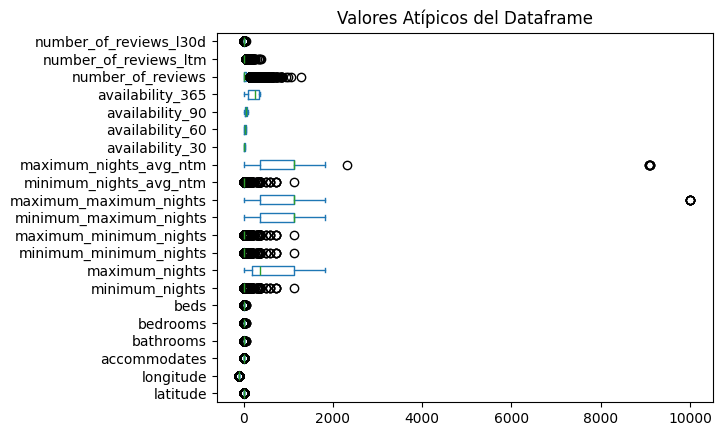

In [8]:
fig= plt.figure(figsize= (15,8))
cuantitativas.plot(kind= 'box',vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

In [9]:
cuantitativas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   latitude                26582 non-null  float64
 1   longitude               26582 non-null  float64
 2   accommodates            26582 non-null  int64  
 3   bathrooms               26582 non-null  float64
 4   bedrooms                26582 non-null  float64
 5   beds                    26582 non-null  float64
 6   minimum_nights          26582 non-null  int64  
 7   maximum_nights          26582 non-null  int64  
 8   minimum_minimum_nights  26582 non-null  int64  
 9   maximum_minimum_nights  26582 non-null  int64  
 10  minimum_maximum_nights  26582 non-null  int64  
 11  maximum_maximum_nights  26582 non-null  int64  
 12  minimum_nights_avg_ntm  26582 non-null  float64
 13  maximum_nights_avg_ntm  26582 non-null  float64
 14  availability_30         26582 non-null

In [10]:
#ENCUENTRO LOS VALORES EXTREMOS APLICANDO DESVIACIÓN ESTANDAR

y=cuantitativas
Limite_Superior= y.mean()+3*y.std()
Limite_Inferior= y.mean()-3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido latitude                    19.532892
longitude                  -99.066742
accommodates                10.430103
bathrooms                    4.584733
bedrooms                     5.346827
beds                         6.985210
minimum_nights              81.830056
maximum_nights            1793.886762
minimum_minimum_nights      78.220196
maximum_minimum_nights      80.407806
minimum_maximum_nights    2058.532035
maximum_maximum_nights    2133.457176
minimum_nights_avg_ntm      79.496621
maximum_nights_avg_ntm    2102.282688
availability_30             48.523868
availability_60             97.331591
availability_90            149.606839
availability_365           602.609273
number_of_reviews          271.153557
number_of_reviews_ltm       75.059793
number_of_reviews_l30d       6.823979
dtype: float64
Limite inferior permitido latitude                   19.276851
longitude                 -99.266495
accommodates               -3.750922
bathrooms               

In [11]:
#OBTENEMOS LOS DATOS Y LOS OUTLIERS SE CONVIERTEN EN NULOS EN EL DATAFRAME
data3=cuantitativas[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data3

,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,...,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d
0,19.383820,NaN,2.0,1.0,1.0,1.0,1.0,7.0,1.0,1.0,...,7.0,1.0,7.0,28,58,88,363,0.0,0.0,0.0
1,19.411620,-99.177940,NaN,1.0,5.0,2.0,1.0,365.0,1.0,1.0,...,365.0,1.0,365.0,1,24,54,325,64.0,0.0,0.0
2,19.411520,-99.168570,4.0,1.0,2.0,2.0,2.0,30.0,2.0,2.0,...,30.0,2.0,30.0,3,20,50,325,49.0,4.0,0.0
3,19.356140,-99.163080,2.0,1.0,1.0,1.0,5.0,180.0,3.0,5.0,...,180.0,3.7,180.0,7,27,57,257,127.0,7.0,2.0
4,19.432110,-99.193270,2.0,1.5,1.0,1.0,1.0,365.0,1.0,1.0,...,1125.0,1.0,1125.0,9,9,20,275,11.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,19.387329,-99.246731,4.0,1.0,2.0,2.0,1.0,45.0,2.0,6.0,...,45.0,2.9,45.0,30,60,90,365,0.0,0.0,0.0
26578,19.432687,-99.197736,2.0,1.0,1.0,1.0,1.0,365.0,1.0,1.0,...,365.0,1.0,365.0,0,0,0,177,0.0,0.0,0.0
26579,19.432687,-99.197736,2.0,1.0,1.0,1.0,1.0,365.0,1.0,1.0,...,365.0,1.0,365.0,0,0,0,177,0.0,0.0,0.0
26580,19.432687,-99.197736,2.0,1.0,1.0,1.0,1.0,365.0,1.0,1.0,...,365.0,1.0,365.0,0,0,0,177,0.0,0.0,0.0


In [12]:
#CORROBORAMOS VALORES NULOS
valores_nulos=data3.isnull().sum()
valores_nulos

latitude                  357
longitude                 712
accommodates              526
bathrooms                 309
bedrooms                  286
beds                      466
minimum_nights            190
maximum_nights              1
minimum_minimum_nights    174
maximum_minimum_nights    192
minimum_maximum_nights      0
maximum_maximum_nights      7
minimum_nights_avg_ntm    184
maximum_nights_avg_ntm      7
availability_30             0
availability_60             0
availability_90             0
availability_365            0
number_of_reviews         608
number_of_reviews_ltm     432
number_of_reviews_l30d    511
dtype: int64

In [13]:
data_clean= data3.copy()
data_clean=data_clean.fillna(round(data3.mean(),1))
data_clean

,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,...,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d
0,19.383820,-99.200000,2.0,1.0,1.0,1.0,1.0,7.0,1.0,1.0,...,7.0,1.0,7.0,28,58,88,363,0.0,0.0,0.0
1,19.411620,-99.177940,3.1,1.0,5.0,2.0,1.0,365.0,1.0,1.0,...,365.0,1.0,365.0,1,24,54,325,64.0,0.0,0.0
2,19.411520,-99.168570,4.0,1.0,2.0,2.0,2.0,30.0,2.0,2.0,...,30.0,2.0,30.0,3,20,50,325,49.0,4.0,0.0
3,19.356140,-99.163080,2.0,1.0,1.0,1.0,5.0,180.0,3.0,5.0,...,180.0,3.7,180.0,7,27,57,257,127.0,7.0,2.0
4,19.432110,-99.193270,2.0,1.5,1.0,1.0,1.0,365.0,1.0,1.0,...,1125.0,1.0,1125.0,9,9,20,275,11.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,19.387329,-99.246731,4.0,1.0,2.0,2.0,1.0,45.0,2.0,6.0,...,45.0,2.9,45.0,30,60,90,365,0.0,0.0,0.0
26578,19.432687,-99.197736,2.0,1.0,1.0,1.0,1.0,365.0,1.0,1.0,...,365.0,1.0,365.0,0,0,0,177,0.0,0.0,0.0
26579,19.432687,-99.197736,2.0,1.0,1.0,1.0,1.0,365.0,1.0,1.0,...,365.0,1.0,365.0,0,0,0,177,0.0,0.0,0.0
26580,19.432687,-99.197736,2.0,1.0,1.0,1.0,1.0,365.0,1.0,1.0,...,365.0,1.0,365.0,0,0,0,177,0.0,0.0,0.0


In [14]:
#CORROBORAMOS VALORES NULOS
valores_nulos=data_clean.isnull().sum()
valores_nulos

latitude                  0
longitude                 0
accommodates              0
bathrooms                 0
bedrooms                  0
beds                      0
minimum_nights            0
maximum_nights            0
minimum_minimum_nights    0
maximum_minimum_nights    0
minimum_maximum_nights    0
maximum_maximum_nights    0
minimum_nights_avg_ntm    0
maximum_nights_avg_ntm    0
availability_30           0
availability_60           0
availability_90           0
availability_365          0
number_of_reviews         0
number_of_reviews_ltm     0
number_of_reviews_l30d    0
dtype: int64

In [15]:
#METODO APLICANDO CUARTILES, ENCUENTRO CUARTILES 0.25 Y 0.75
y=cuantitativas
percentile25= y.quantile(0.25) #Q1
percentile75= y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25- 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido latitude                    19.494089
longitude                  -99.117734
accommodates                 7.000000
bathrooms                    3.500000
bedrooms                     3.500000
beds                         3.500000
minimum_nights               3.500000
maximum_nights            2542.500000
minimum_minimum_nights       3.500000
maximum_minimum_nights       6.000000
minimum_maximum_nights    2265.000000
maximum_maximum_nights    2265.000000
minimum_nights_avg_ntm       5.250000
maximum_nights_avg_ntm    2265.000000
availability_30             63.500000
availability_60            113.000000
availability_90            162.500000
availability_365           710.500000
number_of_reviews          135.500000
number_of_reviews_ltm       52.500000
number_of_reviews_l30d       5.000000
dtype: float64
Limite inferior permitido latitude                    19.327982
longitude                  -99.215777
accommodates                -1.000000
bathrooms            

In [16]:
#OBTENEMOSN DATOS LIMPIOS DEL DATAFRAME
data3_iqr=cuantitativas[(y<=Limite_Superior_iqr)&(Limite_Inferior_iqr)]
data3_iqr

,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,...,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d
0,19.383820,-99.273340,2.0,1.0,1.0,1.0,1.0,7,1.0,1.0,...,7.0,1.0,7.0,28,58,88,363,0.0,0.0,0.0
1,19.411620,-99.177940,NaN,1.0,NaN,2.0,1.0,365,1.0,1.0,...,365.0,1.0,365.0,1,24,54,325,64.0,0.0,0.0
2,19.411520,-99.168570,4.0,1.0,2.0,2.0,2.0,30,2.0,2.0,...,30.0,2.0,30.0,3,20,50,325,49.0,4.0,0.0
3,19.356140,-99.163080,2.0,1.0,1.0,1.0,NaN,180,3.0,5.0,...,180.0,3.7,180.0,7,27,57,257,127.0,7.0,2.0
4,19.432110,-99.193270,2.0,1.5,1.0,1.0,1.0,365,1.0,1.0,...,1125.0,1.0,1125.0,9,9,20,275,11.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,19.387329,-99.246731,4.0,1.0,2.0,2.0,1.0,45,2.0,6.0,...,45.0,2.9,45.0,30,60,90,365,0.0,0.0,0.0
26578,19.432687,-99.197736,2.0,1.0,1.0,1.0,1.0,365,1.0,1.0,...,365.0,1.0,365.0,0,0,0,177,0.0,0.0,0.0
26579,19.432687,-99.197736,2.0,1.0,1.0,1.0,1.0,365,1.0,1.0,...,365.0,1.0,365.0,0,0,0,177,0.0,0.0,0.0
26580,19.432687,-99.197736,2.0,1.0,1.0,1.0,1.0,365,1.0,1.0,...,365.0,1.0,365.0,0,0,0,177,0.0,0.0,0.0


In [17]:
#CORROBORAMOS VALORES NULOS
valores_nulos=data3_iqr.isnull().sum()
valores_nulos

latitude                   137
longitude                 1599
accommodates              1352
bathrooms                  644
bedrooms                   858
beds                      2447
minimum_nights            3584
maximum_nights               0
minimum_minimum_nights    3124
maximum_minimum_nights    2040
minimum_maximum_nights       0
maximum_maximum_nights       7
minimum_nights_avg_ntm    2023
maximum_nights_avg_ntm       7
availability_30              0
availability_60              0
availability_90              0
availability_365             0
number_of_reviews         2328
number_of_reviews_ltm     1318
number_of_reviews_l30d     813
dtype: int64

In [18]:
#remplazamos valores atipicos (nulos) del dataframe con mean

data4_iqr=data3_iqr.copy()
data4_iqr=data4_iqr.fillna(round(data3_iqr.mean(),1))
data4_iqr

,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,...,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d
0,19.383820,-99.273340,2.0,1.0,1.0,1.0,1.0,7,1.0,1.0,...,7.0,1.0,7.0,28,58,88,363,0.0,0.0,0.0
1,19.411620,-99.177940,2.9,1.0,1.4,2.0,1.0,365,1.0,1.0,...,365.0,1.0,365.0,1,24,54,325,64.0,0.0,0.0
2,19.411520,-99.168570,4.0,1.0,2.0,2.0,2.0,30,2.0,2.0,...,30.0,2.0,30.0,3,20,50,325,49.0,4.0,0.0
3,19.356140,-99.163080,2.0,1.0,1.0,1.0,1.6,180,3.0,5.0,...,180.0,3.7,180.0,7,27,57,257,127.0,7.0,2.0
4,19.432110,-99.193270,2.0,1.5,1.0,1.0,1.0,365,1.0,1.0,...,1125.0,1.0,1125.0,9,9,20,275,11.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,19.387329,-99.246731,4.0,1.0,2.0,2.0,1.0,45,2.0,6.0,...,45.0,2.9,45.0,30,60,90,365,0.0,0.0,0.0
26578,19.432687,-99.197736,2.0,1.0,1.0,1.0,1.0,365,1.0,1.0,...,365.0,1.0,365.0,0,0,0,177,0.0,0.0,0.0
26579,19.432687,-99.197736,2.0,1.0,1.0,1.0,1.0,365,1.0,1.0,...,365.0,1.0,365.0,0,0,0,177,0.0,0.0,0.0
26580,19.432687,-99.197736,2.0,1.0,1.0,1.0,1.0,365,1.0,1.0,...,365.0,1.0,365.0,0,0,0,177,0.0,0.0,0.0


In [19]:
Datos_limpios= pd.concat([cualitativas, data4_iqr],axis=1)
Datos_limpios

,last_scraped,name,description,neighborhood_overview,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_verifications,...,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d
0,2024-09-25,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Santa Fe Mall, Interloma Park and the Lion Des...","Mexico City, Mexico",a few days or more,0%,Without information,f,"['email', 'phone', 'work_email']",...,7.0,1.0,7.0,28,58,88,363,0.0,0.0,0.0
1,2024-09-26,Condesa Haus,A new concept of hosting in mexico through a b...,Nothing to say,"Mexico City, Mexico",within an hour,100%,93%,t,"['email', 'phone', 'work_email']",...,365.0,1.0,365.0,1,24,54,325,64.0,0.0,0.0
2,2024-09-26,"2 bedroom apt. deco bldg, Condesa","Comfortably furnished, sunny, 2 bedroom apt., ...",Nothing to say,"Mexico City, Mexico",within an hour,71%,57%,t,"['email', 'phone']",...,30.0,2.0,30.0,3,20,50,325,49.0,4.0,0.0
3,2024-09-25,Beautiful light Studio Coyoacan- full equipped !,COYOACAN designer studio quiet & safe! well eq...,Coyoacan is a beautiful neighborhood famous fo...,"Mexico City, Mexico",within a few hours,100%,100%,t,"['email', 'phone', 'work_email']",...,180.0,3.7,180.0,7,27,57,257,127.0,7.0,2.0
4,2024-09-25,NEW DESIGNER LOFT,Is the best ever place triple L <br />Location...,"Is located in the best area of Mexico City, Po...","Mexico City, Mexico",within an hour,100%,100%,t,"['email', 'phone']",...,1125.0,1.0,1125.0,9,9,20,275,11.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,2024-09-25,Charming 2-Bedroom Retreat in Lomas de Bezares,Experience Mexico City in this delightful retr...,"Welcome to Lomas de Bezares, a neighborhood kn...","Mexico City, Mexico",within an hour,100%,100%,t,"['email', 'phone']",...,45.0,2.9,45.0,30,60,90,365,0.0,0.0,0.0
26578,2024-09-25,Suite King | District Polanco,This spacious room features a plush king-size ...,Nothing to say,"Mexico City, Mexico",within an hour,100%,100%,f,"['email', 'phone']",...,365.0,1.0,365.0,0,0,0,177,0.0,0.0,0.0
26579,2024-09-25,Suite King | District Polanco,Discover the essence of luxury in our king-siz...,Nothing to say,"Mexico City, Mexico",within an hour,100%,100%,f,"['email', 'phone']",...,365.0,1.0,365.0,0,0,0,177,0.0,0.0,0.0
26580,2024-09-25,Suite Queen | District Polanco,Welcome to your refuge in the heart of Polanco...,Nothing to say,"Mexico City, Mexico",within an hour,100%,100%,f,"['email', 'phone']",...,365.0,1.0,365.0,0,0,0,177,0.0,0.0,0.0


In [20]:
#CORROBORAMOS VALORES NULOS
valores_nulos=Datos_limpios.isnull().sum()
valores_nulos

last_scraped                   0
name                           0
description                    0
neighborhood_overview          0
host_location                  0
host_response_time             0
host_response_rate             0
host_acceptance_rate           0
host_is_superhost              0
host_verifications             0
host_has_profile_pic           0
host_identity_verified         0
neighbourhood                  0
neighbourhood_cleansed         0
property_type                  0
room_type                      0
amenities                      0
price                          0
calendar_updated               0
has_availability               0
last_review                    0
review_scores_rating           0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_value            0
instant_bookable               0
reviews_per_month              0
latitude                       0
longitude                      0
accommodat

In [21]:
Datos_limpios.to_csv("Datos_limpios.csv")